***INDEX***
---
- [0. Data Load](#0data-load)
- [1. Merge Transaction & Articles](#1merge-transaction--articles)
- [2. Make Dummy Variable](#2make-dummy-variable)
- [3. Groupby DataFrame](#3groupby-dataframe)
    - [3.1. Reduce Memory Size(Convert dtypes)](#31reduce-memory-size-convert-dtypes)
    - [3.2. Make Gropuby DataFrame (Avoid Memory Error)](#32make-gropuby-dataframe-avoid-memory-error)
    - [3.3. (Save)Load Grouped DataFrame](#33saveload-grouped-dataframe)
- [4. Statistic Check](#4statistic-check)

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
from tqdm import tqdm

warnings.simplefilter(action="ignore")
data_path = "G:/내 드라이브/프로젝트/Kaggle_H&M/data/h-and-m-personalized-fashion-recommendations/"

# 0.Data Load
---

In [2]:
# df_customer = pd.read_csv(data_path+"customers.csv")
df_articles = pd.read_csv(data_path+"articles.csv")
df_transaction = pd.read_csv(data_path+"transactions_train.csv")

In [3]:
df_transaction.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


# 1.Merge transaction & articles
---

In [4]:
merged_df = pd.merge(df_transaction, df_articles[["article_id","product_type_name"]], how="left", on="article_id")
merged_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id,product_type_name
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,Underwear body
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,Bra
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,Sweater
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,Sweater
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,Sweater


In [5]:
del (df_transaction, df_articles)

# 2.Make Dummy Variable
---

In [6]:
import warnings
from feature_engine.encoding import OneHotEncoder as OHE

warnings.simplefilter(action="ignore",category=Warning)

dummy_model = OHE(variables="product_type_name").fit(merged_df)
dummy_df = dummy_model.transform(merged_df)

In [7]:
del (merged_df, dummy_model)

In [8]:
dummy_df.drop(columns=["t_dat","sales_channel_id"], inplace=True)
dummy_df.head()

,customer_id,article_id,price,product_type_name_Underwear body,product_type_name_Bra,product_type_name_Sweater,product_type_name_Blouse,product_type_name_Trousers,product_type_name_Cardigan,product_type_name_Vest top,...,product_type_name_Zipper head,product_type_name_Washing bag,product_type_name_Marker pen,product_type_name_Stain remover spray,product_type_name_Clothing mist,product_type_name_Bumbag,product_type_name_Wireless earphone case,product_type_name_Eyeglasses,product_type_name_Toy,product_type_name_Dog wear
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
dummy_df.info()     # 데이터 형변환 전

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31788324 entries, 0 to 31788323
Columns: 133 entries, customer_id to product_type_name_Dog wear
dtypes: float64(1), int32(130), int64(1), object(1)
memory usage: 16.3+ GB


# 3.Groupby DataFrame
---

## 3.1.Reduce Memory Size (convert dtypes)
---

In [10]:
# 메모리 오버를 피하기 위해 삭제 추가 과정의 반복

for prod_col in tqdm(dummy_df.columns[3:]):
    temp = dummy_df[prod_col].astype("uint8").values
    dummy_df.drop(columns=[prod_col], inplace=True)
    dummy_df[prod_col.split("_")[-1]] = temp
dummy_df.info()     # 데이터 형변환 후

100%|██████████| 130/130 [15:43<00:00,  7.26s/it]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31788324 entries, 0 to 31788323
Columns: 133 entries, customer_id to Dog wear
dtypes: float64(1), int64(1), object(1), uint8(130)
memory usage: 4.8+ GB


In [ ]:
# !! Memory Error !!

# grouped_df = dummy_df.groupby(by=["customer_id"], as_index=False)[dummy_df.columns[4:]].sum()
# grouped_df.head()

## 3.2.Make Gropuby DataFrame (Avoid Memory Error)
---

In [30]:
# 다중 인덱서 검색 테스트
dummy_df.loc[dummy_df["customer_id"].isin(dummy_df["customer_id"].unique()[:3])]

,customer_id,article_id,price,Underwear body,Bra,Sweater,Blouse,Trousers,Cardigan,Vest top,...,Zipper head,Washing bag,Marker pen,Stain remover spray,Clothing mist,Bumbag,Wireless earphone case,Eyeglasses,Toy,Dog wear
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24773523,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,870304002,0.033881,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24773524,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,852643001,0.025407,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24773525,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,852643003,0.025407,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25673716,00007d2de826758b65a93dd24ce629ed66842531df6699...,808651003,0.061000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# customer을 1000개로 쪼개기
test = dummy_df["customer_id"].unique()     # customer_id의 unique 값
last = test[-281:]                          # 1000단위에서 떨어진 281개 분리
used = test[:len(test)-len(last)]           # 1000단위를 맞출 수 있도록 계산
split_customer = np.split(used, 1000)       # split
split_customer.append(last)                 # 분리한 값 추가
len(split_customer)

1001

In [32]:
del (test, last, used, temp)

In [33]:
# 전체 DF에 groupby를 취할 경우 Memory Error가 발생하므로 작은 단위부터 결합하는 방식을 사용

hard_gb_df = pd.DataFrame()
sequential_idx = 0
for customer_id in tqdm(split_customer):
    temp_a = dummy_df.loc[dummy_df["customer_id"].isin(customer_id)]
    temp_b = temp_a.groupby(by=["customer_id"], as_index=False)[dummy_df.columns[2:]].sum()
    hard_gb_df = pd.concat([hard_gb_df, temp_b], axis=0)
    del (temp_a, temp_b)      # 메모리를 조금이라도 줄이고자 변수 삭제 과정 수행 (I/O 과정에서 오는 낭비가 있을 수도 있다.)

100%|██████████| 1001/1001 [18:20<00:00,  1.10s/it]


In [35]:
hard_gb_df.head()

,customer_id,price,Underwear body,Bra,Sweater,Blouse,Trousers,Cardigan,Vest top,Skirt,...,Zipper head,Washing bag,Marker pen,Stain remover spray,Clothing mist,Bumbag,Wireless earphone case,Eyeglasses,Toy,Dog wear
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.704780,2.0,1.0,4.0,2.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00007d2de826758b65a93dd24ce629ed66842531df6699...,3.823610,4.0,11.0,5.0,9.0,5.0,1.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,0.627932,0.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0008968c0d451dbc5a9968da03196fe20051965edde741...,1.513136,0.0,7.0,12.0,1.0,4.0,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,1.490559,0.0,6.0,5.0,2.0,4.0,0.0,10.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
del (customer_id, dummy_df, prod_col, sequential_idx, split_customer)

In [34]:
len(hard_gb_df["customer_id"])

1362281

In [40]:
hard_gb_df.head()

,customer_id,price,Underwear body,Bra,Sweater,Blouse,Trousers,Cardigan,Vest top,Skirt,...,Zipper head,Washing bag,Marker pen,Stain remover spray,Clothing mist,Bumbag,Wireless earphone case,Eyeglasses,Toy,Dog wear
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.704780,2.0,1.0,4.0,2.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00007d2de826758b65a93dd24ce629ed66842531df6699...,3.823610,4.0,11.0,5.0,9.0,5.0,1.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,0.627932,0.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0008968c0d451dbc5a9968da03196fe20051965edde741...,1.513136,0.0,7.0,12.0,1.0,4.0,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,1.490559,0.0,6.0,5.0,2.0,4.0,0.0,10.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
for prod_col in tqdm(hard_gb_df.columns[2:]):
    hard_gb_df[prod_col] = hard_gb_df[prod_col].astype("uint8")
hard_gb_df.info()

100%|██████████| 130/130 [00:05<00:00, 23.56it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362281 entries, 0 to 1362280
Columns: 132 entries, customer_id to Dog wear
dtypes: float64(1), object(1), uint8(130)
memory usage: 189.7+ MB


## 3.3.(Save)Load Grouped DataFrame
---

In [2]:
# hard_gb_df.to_csv(data_path+"grouped_df.csv", index=False)
hard_gb_df = pd.read_csv(data_path+"grouped_df.csv")
for prod_col in tqdm(hard_gb_df.columns[2:]):
    hard_gb_df[prod_col] = hard_gb_df[prod_col].astype("uint8")
hard_gb_df.info()

100%|██████████| 130/130 [00:20<00:00,  6.35it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362281 entries, 0 to 1362280
Columns: 132 entries, customer_id to Dog wear
dtypes: float64(1), object(1), uint8(130)
memory usage: 189.7+ MB


# 4.Statistic Check
---

In [32]:
%matplotlib inline
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["axes.unicode_minus"] = False
plt.style.use("ggplot")

## 4.1.Price Feature
---

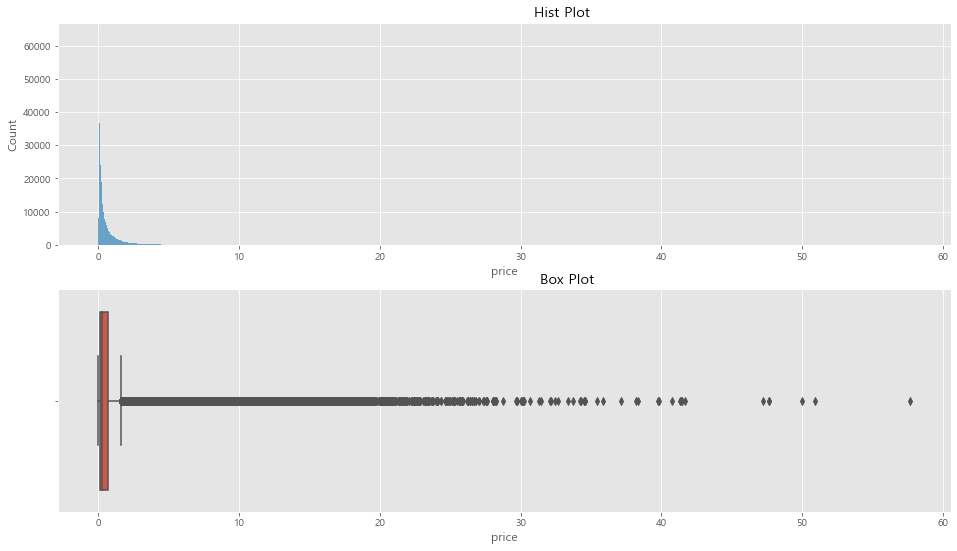

,Percent,Values,Count
0,0.0,0.000763,1
1,0.1,0.042339,138984
2,0.2,0.068593,133586
3,0.3,0.109068,136118
4,0.4,0.164305,136284
5,0.5,0.245593,136219
6,0.6,0.366492,136177
7,0.7,0.560542,136230
8,0.8,0.892695,136227
9,0.9,1.622898,136227


In [36]:
#-- quantile
idx, qnt, cnt = [], [0], []
for per in range(0,11):
    idx.append(per/10)
    qnt.append(hard_gb_df["price"].quantile(per/10))
    cnt.append(hard_gb_df["price"].loc[(hard_gb_df["price"]<=qnt[-1]) & 
                                       (hard_gb_df["price"]>qnt[-2])].count())
qnt.pop(0)

#-- visualization
fig, ax = plt.subplots(2,1, squeeze=True)

sns.histplot(ax=ax[0], data = hard_gb_df["price"])
ax[0].set_title("                       Hist Plot")
sns.boxplot(ax=ax[1], x=hard_gb_df["price"])
ax[1].set_title("                         Box Plot")
plt.show()

pd.DataFrame(data={"Percent" : idx,"Values" : qnt, "Count" : cnt})